In [1]:
# imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [2]:
# Data is loaded
data = load_diabetes(as_frame=True).frame

In [3]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# The feature that was chosen is BMI, as it is highly related to obesity, which is a highly-correlated feature with diabetes
features = data["bmi"]
target = data["target"]

In [5]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [6]:
# Data is split into training and testing datasets. The training uses every row, except for the last 20, while testing only gets
# the last 20 rows
features_train = features.iloc[0: -20]
features_test = features.iloc[-20: ]

In [7]:
target_train = target.iloc[0 : -20]
target_test = target.iloc[-20: ]

# Model training

In [8]:
# The training and testing datasets get reshaped for an easier handling both for the training and the results visualization
reg = LinearRegression()
reshaped_features_train = features_train.values.reshape(-1,1)
reshaped_features_test = features_test.values.reshape(-1,1)
reg.fit(reshaped_features_train, target_train)

LinearRegression()

# Prediction and Measurement

In [9]:
# First 10 samples of the testing dataset are used to see how they are predicted
predicted = reg.predict(features_test.head(n=10).values.reshape(-1,1))
actual = target_test.head(n=10).values
coef = reg.coef_
mse = mean_squared_error(actual, predicted)
rmse = sqrt(mse)
print("BMI\t\t\tPredicted\t\t\tActual\t\t\tError")
for i in range(len(predicted)):
    print("{}\t\t{}\t\t{}\t\t{}".format(reshaped_features_test[i] ,predicted[i], actual[i], predicted[i] - actual[i]))

BMI			Predicted			Actual			Error
[0.07786339]		225.97324010300437		233.0		-7.026759896995628
[-0.03961813]		115.74763374486452		91.0		24.747633744864515
[0.01103904]		163.27610621121838		111.0		52.27610621121838
[-0.04069594]		114.73638964983573		152.0		-37.26361035016427
[-0.03422907]		120.80385422000855		120.0		0.8038542200085459
[0.00564998]		158.21988573607436		67.0		91.21988573607436
[0.08864151]		236.08568105329243		310.0		-73.91431894670757
[-0.03315126]		121.81509831503737		94.0		27.815098315037375
[-0.05686312]		99.56772822440365		183.0		-83.43227177559635
[-0.03099563]		123.83758650509498		66.0		57.837586505094976


In [10]:
print("Feature coefficient: {}".format(coef))
print("Root Mean Squared Error: {}".format(rmse))

Feature coefficient: [938.23786125]
Root Mean Squared Error: 54.45001288233737


# Visualization

Text(0, 0.5, 'Progression')

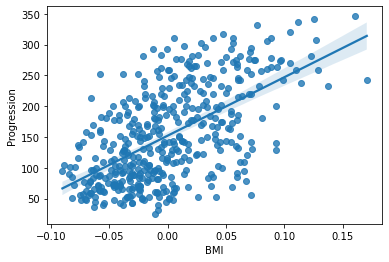

In [11]:
# Plot showing a scatterplot with the BMI as the x axis and the progression of diabetes in the y axis. 
# It is also shown a regression using the feature BMI to predict the progression of diabetes
sns.regplot(data = data, x = "bmi", y = "target")#, x_estimator=coef)
plt.xlabel("BMI")
plt.ylabel("Progression")